In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px ## World Map

In [33]:
df=pd.read_csv("ashish nagar.csv")
df.head()

,date,population
0,06-01-2022,28
1,14-02-2022,27
2,22-03-2022,24
3,09-04-2022,26
4,21-05-2022,20


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        12 non-null     object
 1   population  12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes


In [35]:
df.isnull().sum()

date          0
population    0
dtype: int64

In [36]:
df["date"]= pd.to_datetime(df["date"])

<ipython-input-36-082167ba8dcc>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["date"]= pd.to_datetime(df["date"])


In [37]:
pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
from prophet import Prophet

In [39]:
population=df.groupby('date')['population'].sum().reset_index()

In [40]:
population.rename(columns={"date":"ds","population":"y"},inplace=True)

In [41]:
model=Prophet(interval_width=0.95)

In [42]:
model.fit(population)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/_1o43qru.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/5podb6yz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81107', 'data', 'file=/tmp/tmpqki2d_87/_1o43qru.json', 'init=/tmp/tmpqki2d_87/5podb6yz.json', 'output', 'file=/tmp/tmpqki2d_87/prophet_modelnd6j5gr6/prophet_model-20230421061059.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:10:59 - cmdstanpy - INFO - Chain [1] start processing
INF

In [43]:
future_dates=model.make_future_dataframe(periods=30)

In [44]:
forecast=model.predict(future_dates)

           ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2022-02-14  23.777796   16.850468   30.882176    23.777796    23.777796   
1  2022-03-22  23.510539   15.952339   30.971171    23.510539    23.510539   
2  2022-05-21  23.065112   16.232124   30.052506    23.065112    23.065112   
3  2022-06-01  22.983450   15.668217   30.471429    22.983450    22.983450   
4  2022-09-04  22.278189   15.005296   30.074463    22.278189    22.278189   
5  2022-09-28  22.100018   14.819373   29.289170    22.100018    22.100018   
6  2022-10-13  21.988661   15.218144   29.244062    21.988661    21.988661   
7  2022-11-07  21.803066   14.785872   28.764983    21.803066    21.803066   
8  2022-11-22  21.691709   14.331411   28.563108    21.691709    21.691709   
9  2022-12-15  21.520962   13.947929   28.569739    21.520962    21.520962   
10 2023-02-17  21.045839   14.092986   28.074245    21.045839    21.045839   
11 2023-06-01  20.273764   13.295180   27.362256    20.273764   

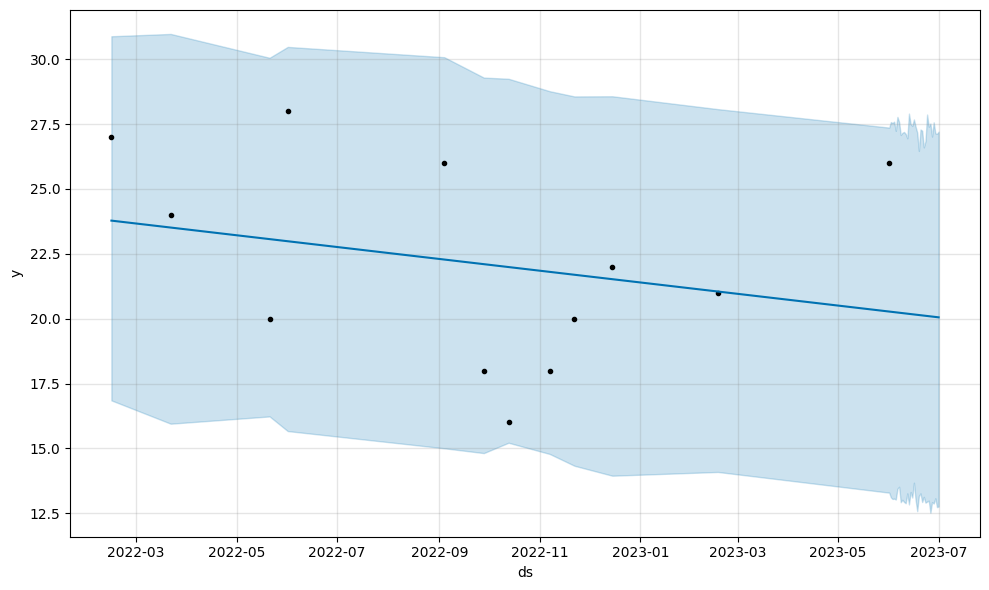

In [45]:
model.plot(forecast)
print(forecast)

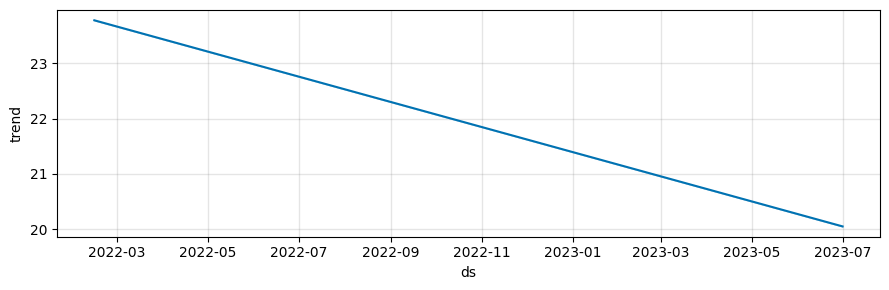

In [46]:
component=model.plot_components(forecast)

In [47]:
model1=Prophet(interval_width=0.95)

In [48]:
model1.fit(population)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/by1nkt4d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/25y1vl65.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88758', 'data', 'file=/tmp/tmpqki2d_87/by1nkt4d.json', 'init=/tmp/tmpqki2d_87/25y1vl65.json', 'output', 'file=/tmp/tmpqki2d_87/prophet_model02uff9r4/prophet_model-20230421061122.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:11:22 - cmdstanpy - INFO - Chain [1] start processing
INF

In [49]:
future_dates=model1.make_future_dataframe(periods=10)

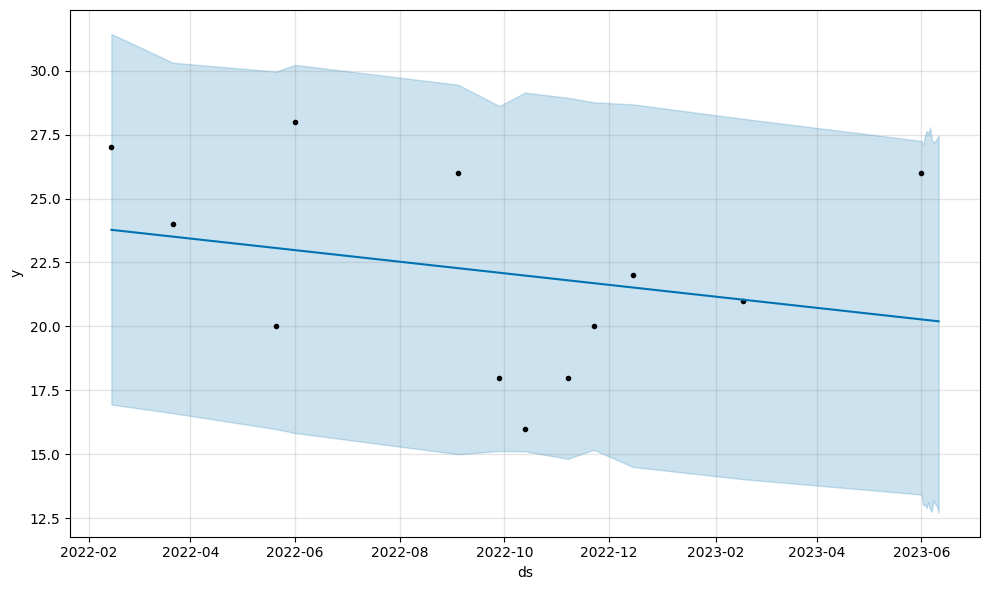

In [50]:
forecasting=model.predict(future_dates)
ploting=model.plot(forecasting)

           ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2022-02-14  23.777796   16.944734   31.438375    23.777796    23.777796   
1  2022-03-22  23.510539   16.604959   30.311779    23.510539    23.510539   
2  2022-05-21  23.065112   15.981533   29.967401    23.065112    23.065112   
3  2022-06-01  22.983450   15.831683   30.228667    22.983450    22.983450   
4  2022-09-04  22.278189   15.002913   29.453780    22.278189    22.278189   
5  2022-09-28  22.100018   15.127545   28.620026    22.100018    22.100018   
6  2022-10-13  21.988661   15.115814   29.143990    21.988661    21.988661   
7  2022-11-07  21.803066   14.820851   28.943046    21.803066    21.803066   
8  2022-11-22  21.691709   15.174522   28.766272    21.691709    21.691709   
9  2022-12-15  21.520962   14.502594   28.682670    21.520962    21.520962   
10 2023-02-17  21.045839   14.026497   28.121950    21.045839    21.045839   
11 2023-06-01  20.273764   13.425041   27.254786    20.273764   

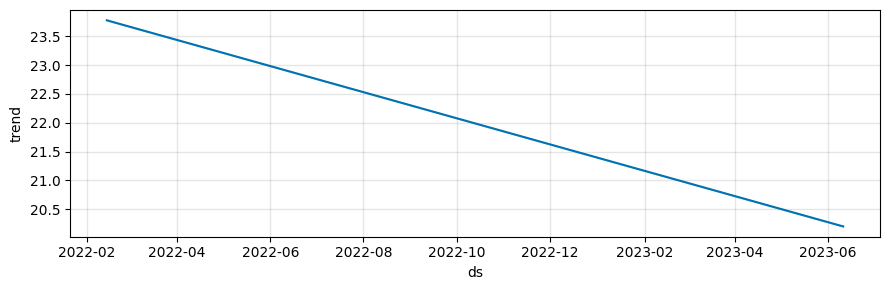

In [51]:
week=model1.plot_components(forecasting)
print(forecasting)